## 1.生成模拟数据

In [1]:
import torch 
import matplotlib.pyplot as plt

# 生成100行2列，值为1的张量
data = torch.ones(100, 2)
# 生成形状为100x2的，值的means=10,std=5的张量，作为两个class的特征值
class1_data = torch.normal(3*data,2)
class2_data = torch.normal(-3*data,2)
# 生成它们的lable
class1_label = torch.zeros(100)
class2_label = torch.ones(100)

# 注意x必须是浮点数type,而标签y必须是整数
x = torch.cat((class1_data, class2_data), 0).type(torch.FloatTensor)  # FloatTensor = 32-bit floating
y = torch.cat((class1_label, class2_label),-1).type(torch.LongTensor)    # LongTensor = 64-bit intege

plt.scatter(x.numpy()[:, 0], x.numpy()[:, 1], c=y.numpy(), s=10, lw=5, cmap='RdYlGn')
plt.show()

<Figure size 640x480 with 1 Axes>

## 2.创建神经网络模型

In [2]:
"""建立神经网络"""
import torch.nn.functional as F

class Net(torch.nn.Module):
    def __init__(self,n_features,n_hidden,n_output):
        super().__init__()
        self.hidden = torch.nn.Linear(n_features,n_hidden)
        self.output = torch.nn.Linear(n_hidden,n_output)
        
    def forward(self,x):
        x = F.relu(self.hidden(x))
        x = self.output(x)
    
        return x  # 这时候的输出值并不是预测值，他是one_hot vector 需要经过转换

net = Net(n_features=2, n_hidden=10, n_output=2)
net

Net(
  (hidden): Linear(in_features=2, out_features=10, bias=True)
  (output): Linear(in_features=10, out_features=2, bias=True)
)

## 3.训练模型

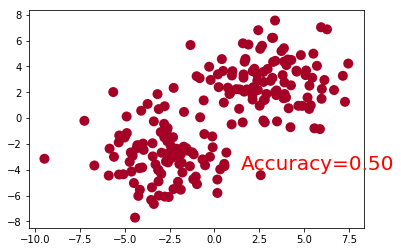

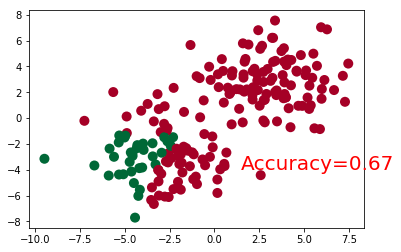

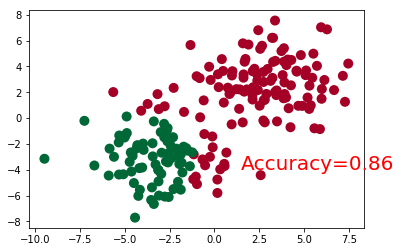

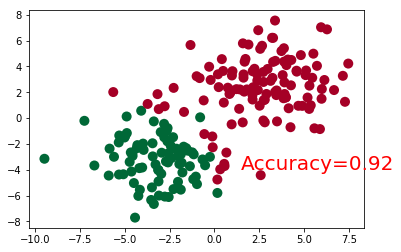

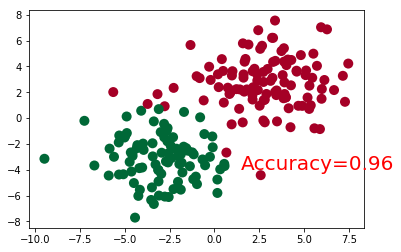

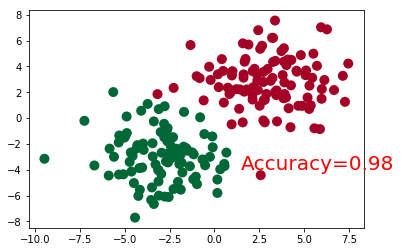

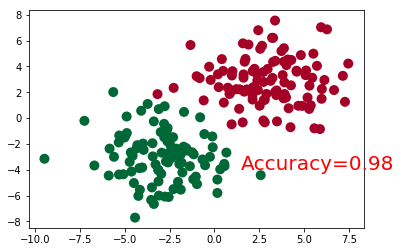

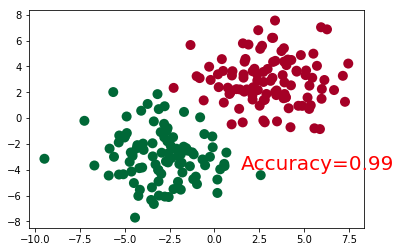

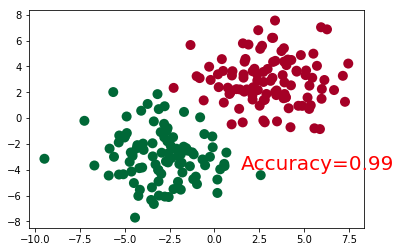

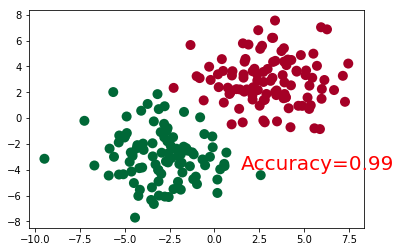

In [6]:
# 新建模型
classification = Net(n_features=2, n_hidden=10, n_output=2)

# 指定损失函数和优化器
loss_funciton = torch.nn.NLLLoss()
optimizer = torch.optim.SGD(classification.parameters(),lr=0.02)

epoches=20
for i in range(epoches):
    
    # 首先梯度清零
    optimizer.zero_grad()
    
    # 向前传播
    output = classification(x)
    # 计算损失
    loss = loss_funciton(output, y)
    # 损失反向传播
    loss.backward()
    # 优化函数更新权重w
    optimizer.step()
    
    if i % 2 == 0:
        plt.cla()
        # 过了一道 softmax 的激励函数后的最大概率才是预测值
        prediction = torch.max(F.softmax(output,dim=1), 1)[1]
        pred_y = prediction.numpy().squeeze()
        target_y = y.numpy()
        plt.scatter(x.numpy()[:, 0], x.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
        accuracy = sum(pred_y == target_y)/200.  # 预测中有多少和真实值一样
        plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)
        
    plt.ioff()  # 停止画图
    plt.show()